Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Importing Dataset

In [2]:
file = pd.read_csv('https://raw.githubusercontent.com//AdiPersonalWorks//Random//master//student_scores%20-%20student_scores.csv')

Inspecting the Data

In [3]:
file.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
file.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
file.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Exploring the Hours Variable

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


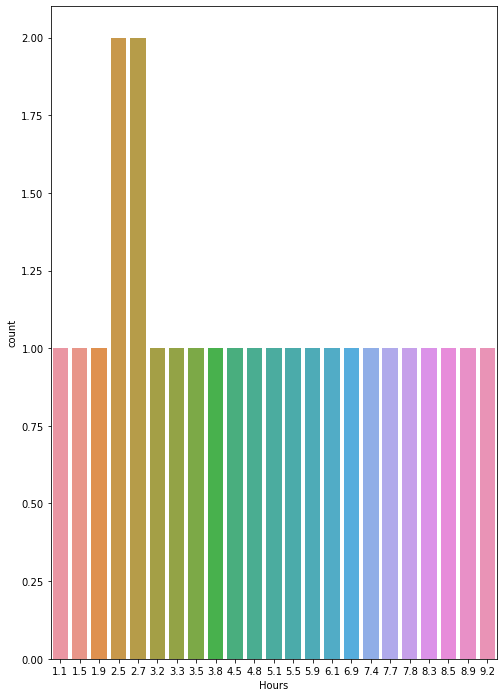

In [6]:
plt.figure(figsize = (8,12))
sns.countplot(file['Hours'])

Relationship of Hours Variable with Scores Variable

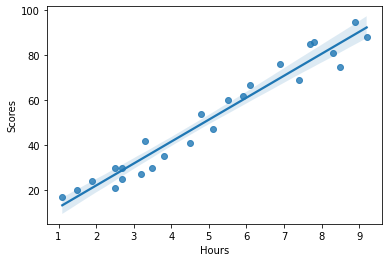

In [7]:
sns.regplot(x = 'Hours', y = 'Scores', data = file)

In [8]:
file.drop(labels = 'Scores',axis = 1).corrwith(file['Scores'])

Hours    0.976191
dtype: float64

In [9]:
pearson_coef, p_value = stats.pearsonr(file['Hours'], file['Scores'])
print(f'The Pearson Correlation Coefficient is {pearson_coef} with a P-value of {p_value}')  

The Pearson Correlation Coefficient is 0.9761906560220884 with a P-value of 9.132624467460325e-17


Splitting the Data into Train & Test sets

In [10]:
X = file.iloc[:,:-1].values
Y = file.iloc[:,-1].values

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 365)

Developing the Model

In [12]:
Regressor_1 = LinearRegression()
Regressor_1.fit(X_train,Y_train)

LinearRegression()

In [13]:
Y_pred = Regressor_1.predict(X_test)

Comparing the Prediction results with available Test Scores

In [18]:
np.concatenate((X_test.reshape(len(X_test),1),Y_test.reshape(len(Y_test),1),Y_pred.reshape(len(Y_pred),1)),axis = 1)

array([[ 3.8       , 35.        , 39.2597796 ],
       [ 1.9       , 24.        , 20.34033368],
       [ 6.9       , 76.        , 70.12834927],
       [ 7.4       , 69.        , 75.10715083],
       [ 1.1       , 17.        , 12.37425119]])

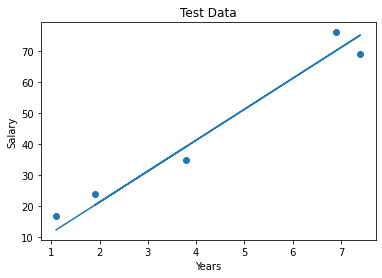

In [15]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,Regressor_1.predict(X_test))
plt.title('Test Data')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.show()

Evaluating the model using r2_Score

In [16]:
print(r2_score(Y_test,Y_pred))

0.9563767995518707


Predicted Score for the given number of hours

In [17]:
Input_hours = float(input('Number of hours: '))
prediction = Regressor_1.predict([[Input_hours]])
print(f'The predicted score is {prediction[0]:.2f}')

Number of hours: 9.5
The predicted score is 96.02
